### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-18,477158,5349919,806302,617395,297568,147634,135544,290340,122403,108238,88708,129399,131033,4849,202154
2021-12-19,477554,5354456,806439,617803,297835,147679,135641,291336,122478,108356,88708,129458,131083,4849,202225
2021-12-20,478007,5361332,807952,617873,297916,147723,135778,292331,122702,108818,88793,129487,131124,4849,202225
2021-12-21,478325,5369161,810045,617948,297916,147896,135931,293329,122931,109328,88887,129534,131167,4849,202338
2021-12-22,478759,5377197,812069,618091,298161,148038,136077,294322,123101,109753,88937,129586,131211,4849,202375


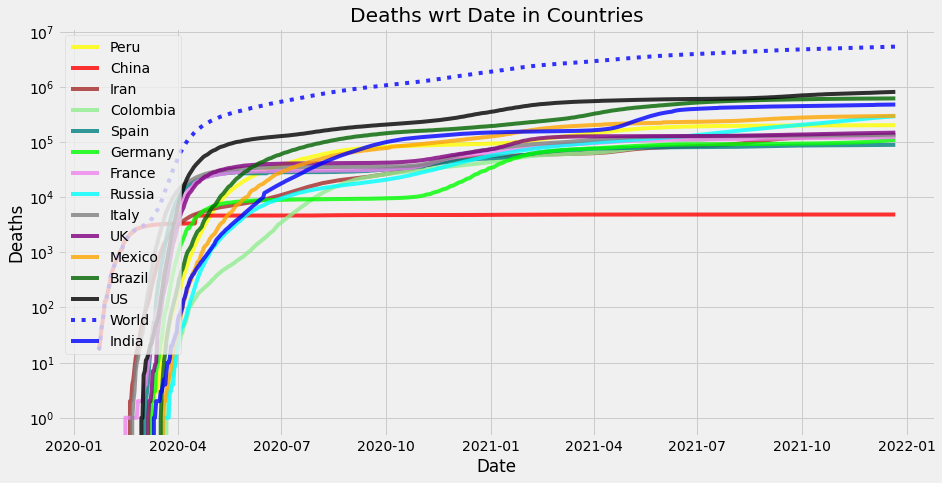

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-18,7145,569918,73605,0,2750,89190,28057,27131,58536,55603,0,2016,1361,88,3559
2021-12-19,13644,471152,73184,8821,2530,82063,24303,27680,48473,-541,0,2038,1968,110,1581
2021-12-20,5326,764898,255061,2094,1557,92598,16205,26744,15132,21742,79704,1699,2390,88,0
2021-12-21,6317,781990,178290,3621,0,89609,30783,25655,72882,64949,49823,1766,2413,86,2395
2021-12-22,7495,884133,238378,3451,2980,105790,36326,25038,84312,44313,60041,1931,2103,106,1782


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-18,8138,608032,114352,6471,2520,57087,16945,30972,42538,46629,14455,2030,3679,75,1488
2021-12-19,8505,598906,111607,6628,2520,58752,17436,30752,42933,43484,13491,2030,3565,78,1495
2021-12-20,8293,609972,121171,6326,2456,61009,17354,30485,41080,42034,17905,2008,3487,78,1395
2021-12-21,8161,621440,124979,6145,2292,62915,18249,30163,43200,43562,20033,1992,3415,79,1462
2021-12-22,8117,638953,132539,5966,2338,65774,19454,29821,45941,43612,22700,1988,3328,81,1483


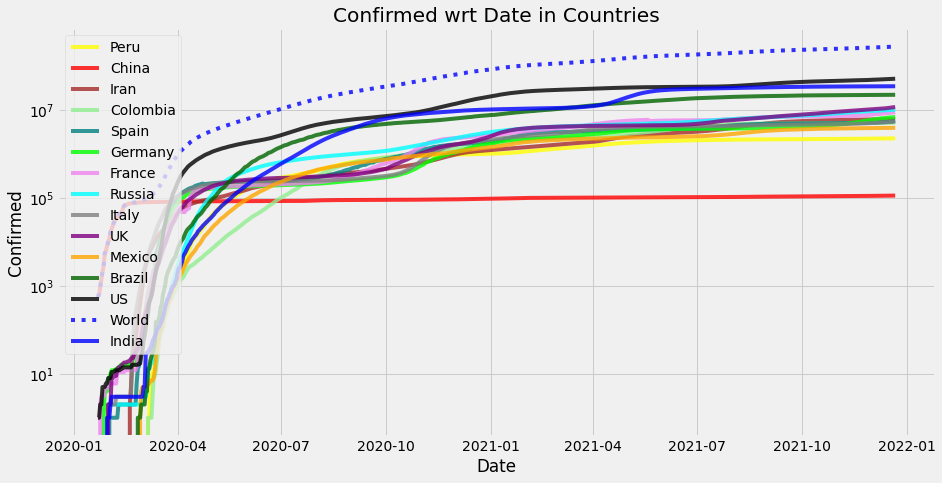

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-18,289,5742,479,0,212,125,123,1048,85,426,0,54,41,0,78
2021-12-19,396,4537,137,408,267,45,97,996,75,118,0,59,50,0,71
2021-12-20,453,6876,1513,70,81,44,137,995,224,462,85,29,41,0,0
2021-12-21,318,7829,2093,75,0,173,153,998,229,510,94,47,43,0,113
2021-12-22,434,8036,2024,143,245,142,146,993,170,425,50,52,44,0,37


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-18,339.35,7074.49,1250.53,137.70,181.85,122.68,102.63,1116.62,130.29,360.59,38.21,48.28,63.54,0.0,60.53
2021-12-19,346.43,6757.31,1111.34,171.49,192.49,112.97,101.92,1101.54,123.38,330.26,33.43,49.62,61.85,0.0,61.84
2021-12-20,359.75,6772.14,1161.55,158.80,178.56,104.35,106.31,1088.22,135.96,346.73,39.88,47.04,59.24,0.0,54.11
2021-12-21,354.53,6904.25,1277.98,148.32,156.24,112.93,112.14,1076.95,147.59,367.14,46.65,47.04,57.21,0.0,61.47
2021-12-22,364.47,7045.72,1371.23,147.66,167.33,116.56,116.38,1066.45,150.39,374.37,47.06,47.66,55.56,0.0,58.41


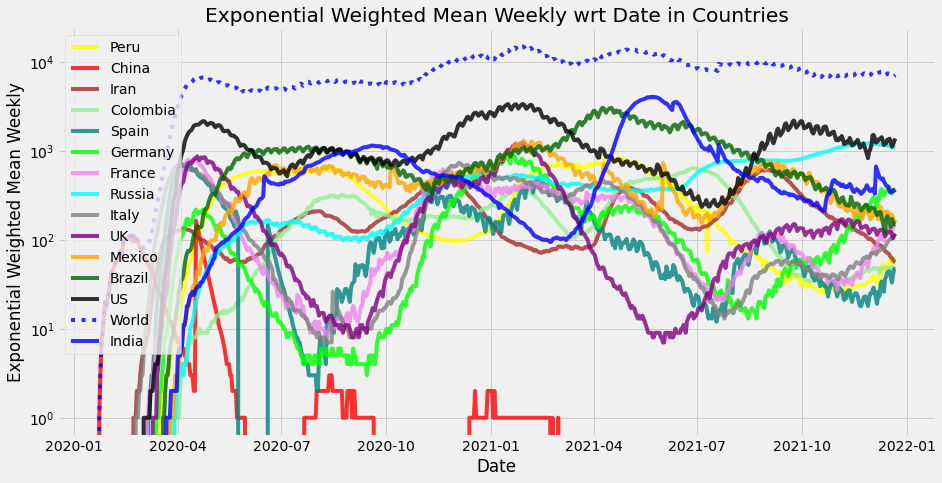

In [18]:
plotter(np.round(AVG), name)

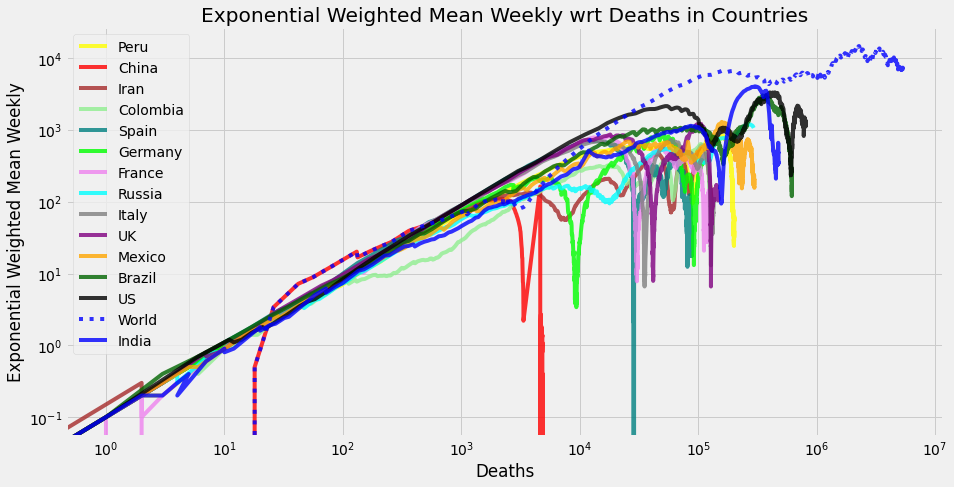

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

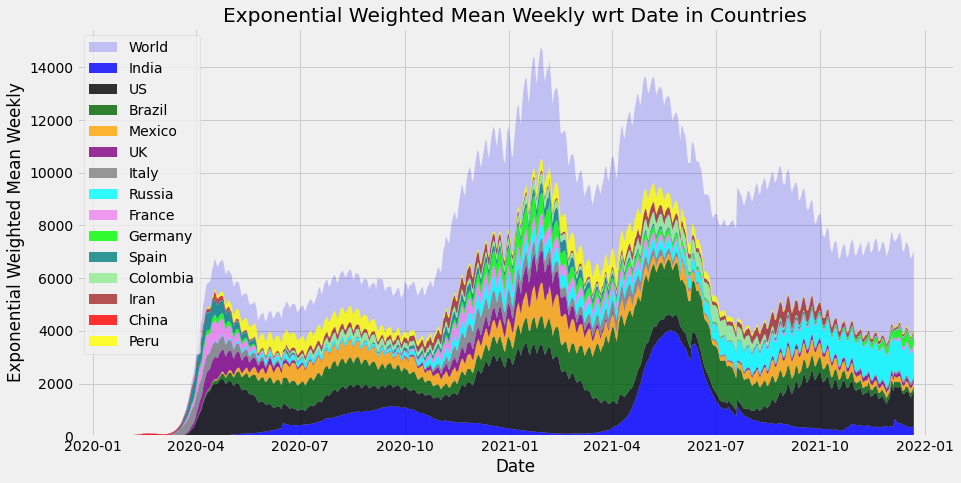

In [20]:
stackplotter(AVG, name)

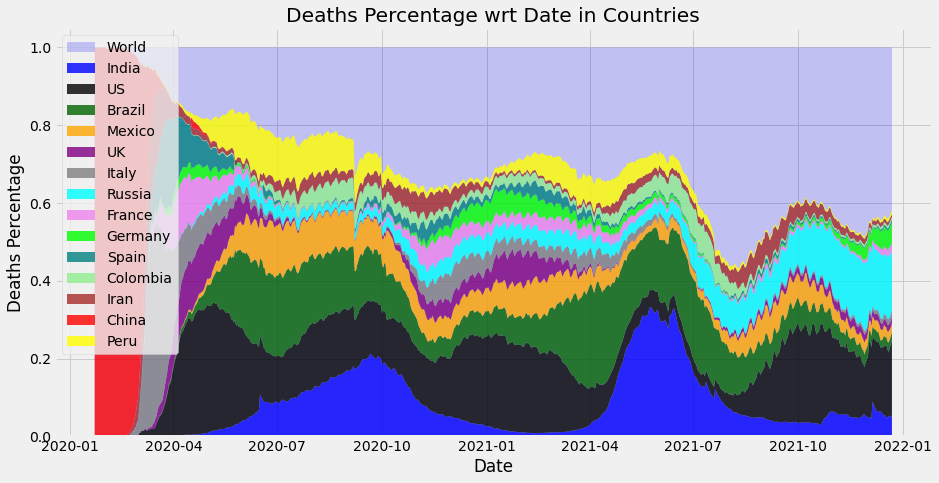

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

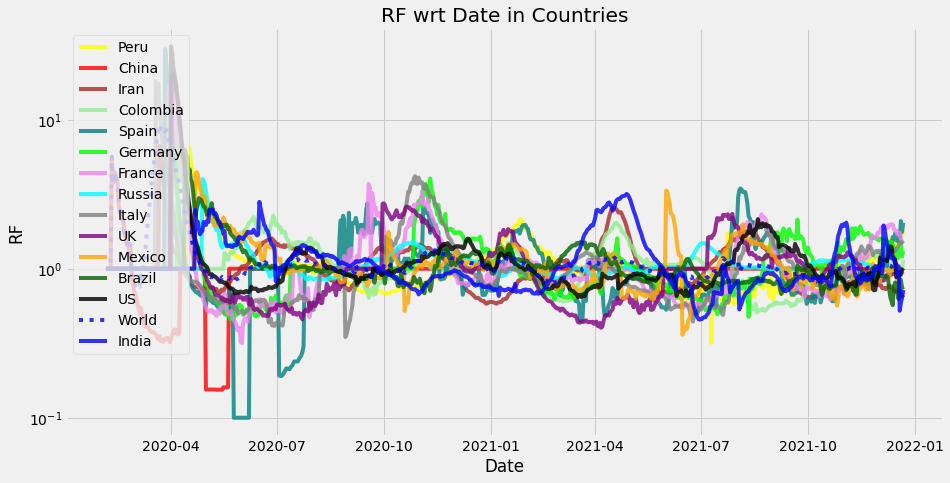

In [23]:
plotter(Reproductivity, 'RF')

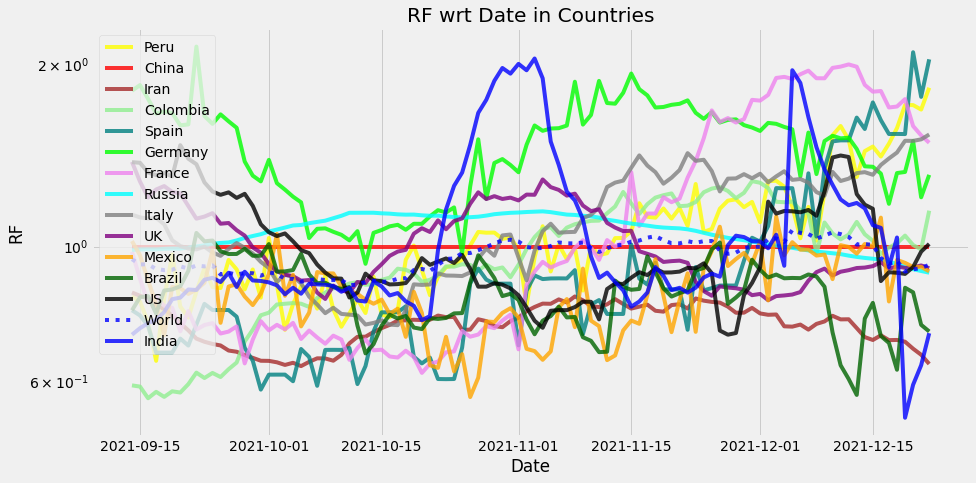

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

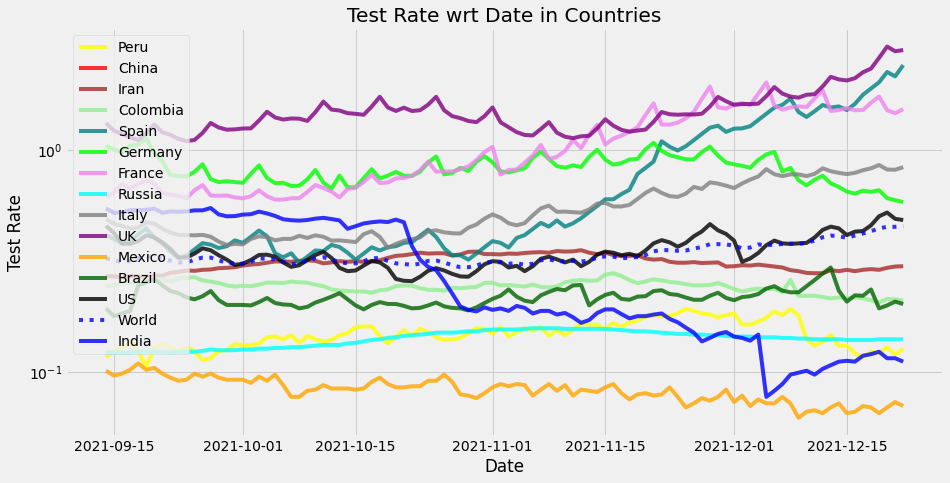

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

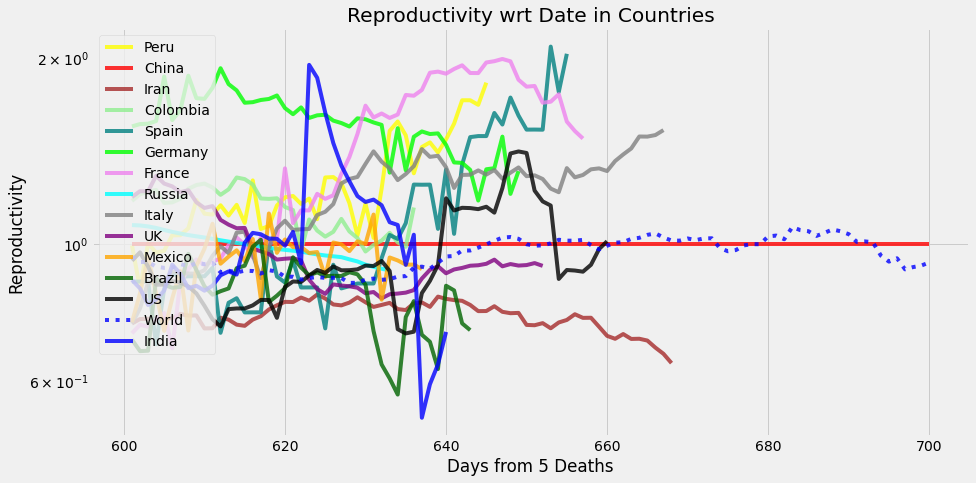

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

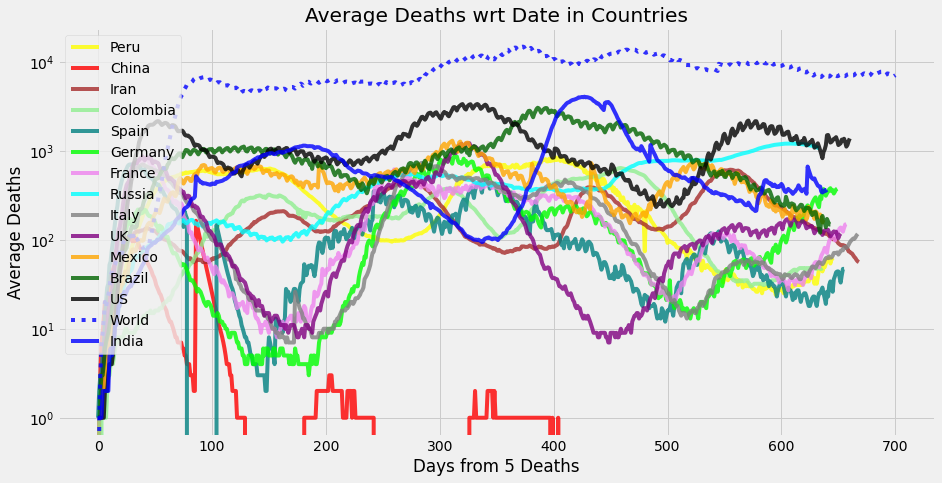

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

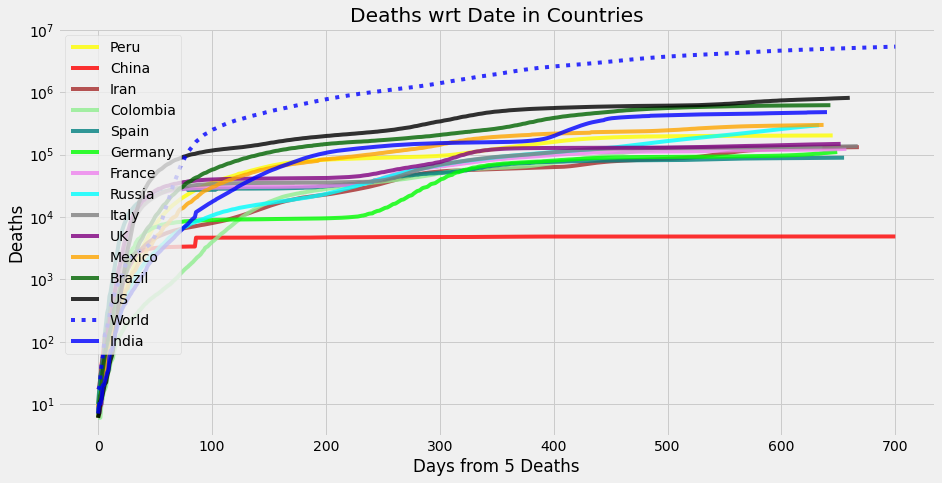

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5377197,8036,6697.71,7045.72,0.9329,277161199,0.453,638953,1075.44
US,812069,2024,1303.57,1371.23,1.0098,51545991,0.483,132539,162.41
Brazil,618091,143,117.14,147.66,0.7247,22222928,0.202,5966,123.62
India,478759,434,325.86,364.47,0.7199,34765976,0.111,8117,95.75
Mexico,298161,245,139.00,167.33,0.9102,3937082,0.070,2338,59.63
Russia,294322,993,1026.71,1066.45,0.9056,10114983,0.140,29821,58.86
Peru,202375,37,67.57,58.41,1.8253,2269497,0.127,1483,40.48
UK,148038,142,112.71,116.56,0.9212,11713654,2.821,65774,29.61
Indonesia,144034,10,9.29,9.55,1.0000,4261072,NaN,265,28.81


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5377197,8036,6697.71,7045.72,0.9329,277161199,0.453,638953,1075.44
US,812069,2024,1303.57,1371.23,1.0098,51545991,0.483,132539,162.41
Russia,294322,993,1026.71,1066.45,0.9056,10114983,0.140,29821,58.86
Poland,92829,777,445.00,428.42,1.2082,4000270,0.222,18994,18.57
Germany,109753,425,363.71,374.37,1.3120,6943750,0.582,43612,21.95
India,478759,434,325.86,364.47,0.7199,34765976,0.111,8117,95.75
Ukraine,99856,328,306.00,350.32,0.7096,3801079,0.139,9727,19.97
Vietnam,30251,210,233.57,228.17,1.2060,1588335,0.335,15305,6.05
Turkey,80957,179,180.14,183.96,0.9288,9230805,0.559,20550,16.19


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5377197


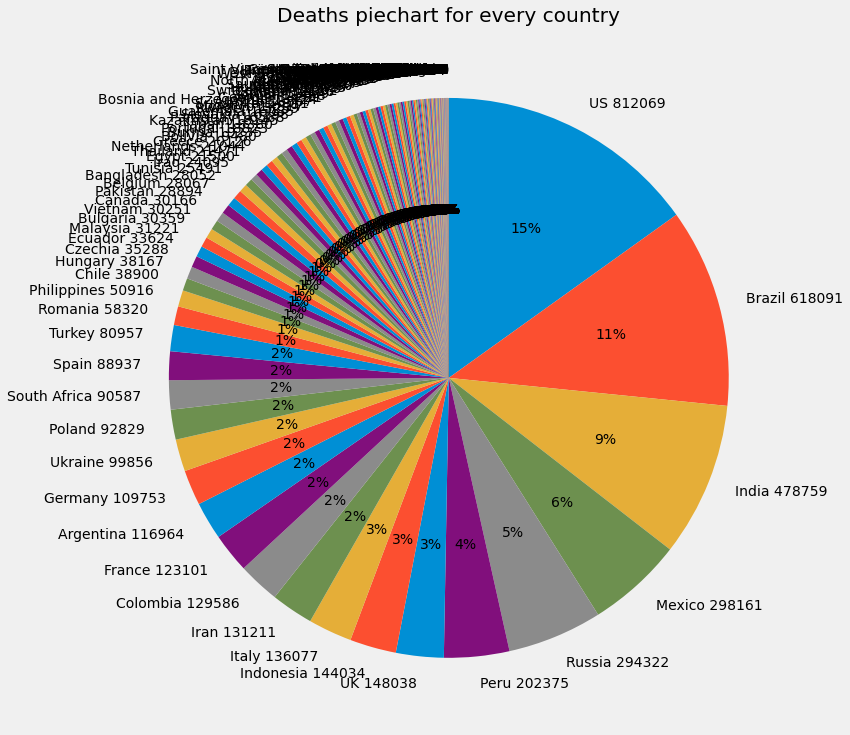

In [35]:
piechart('Deaths')

World total:  6697


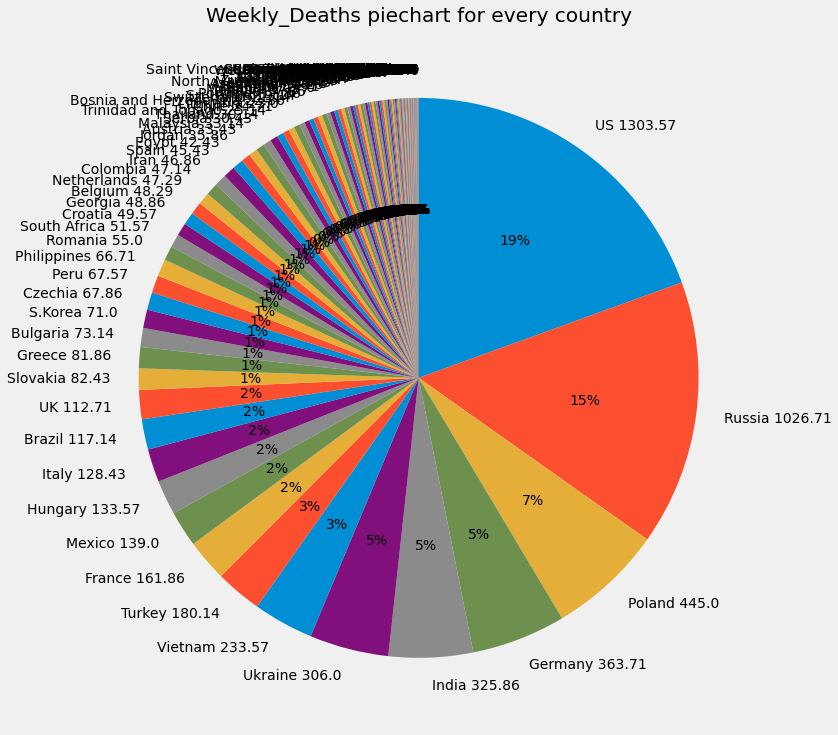

In [36]:
piechart('Weekly_Deaths')

World total:  8036


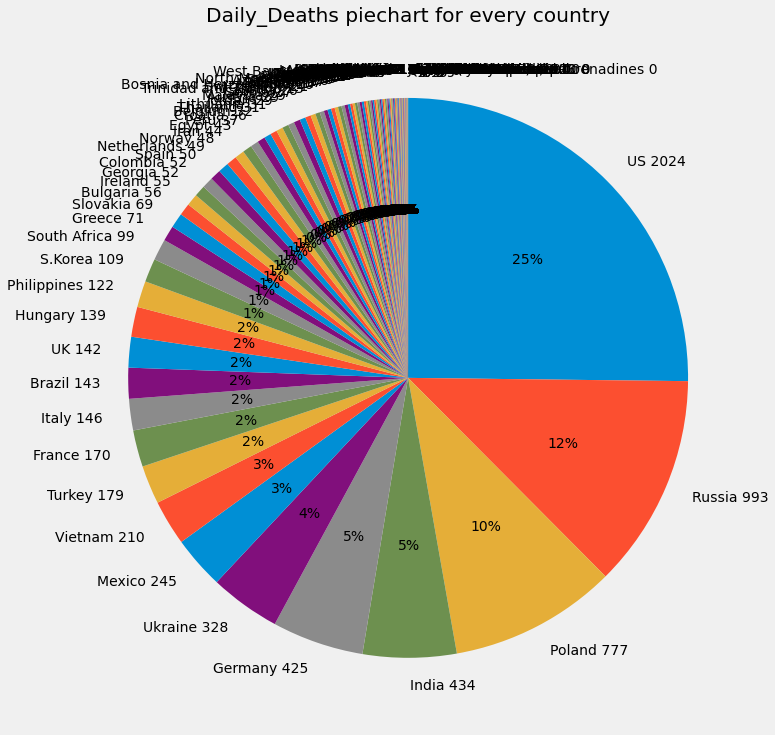

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-12-23


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1075439400.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 6ec0e9c] `date` update
 2 files changed, 2128 insertions(+), 2132 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (67%)
 create mode 100644 run.bat


To https://github.com/Arrowheadahp/COVID-19.git
   459823c..6ec0e9c  master -> master
